<a href="https://colab.research.google.com/github/jerom19/Iris/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import lib

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

2. Load Dataset

In [2]:
iris = pd.read_csv("/content/Iris.csv")

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.drop("Id", axis = 1, inplace = True)

In [5]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


3.EDA

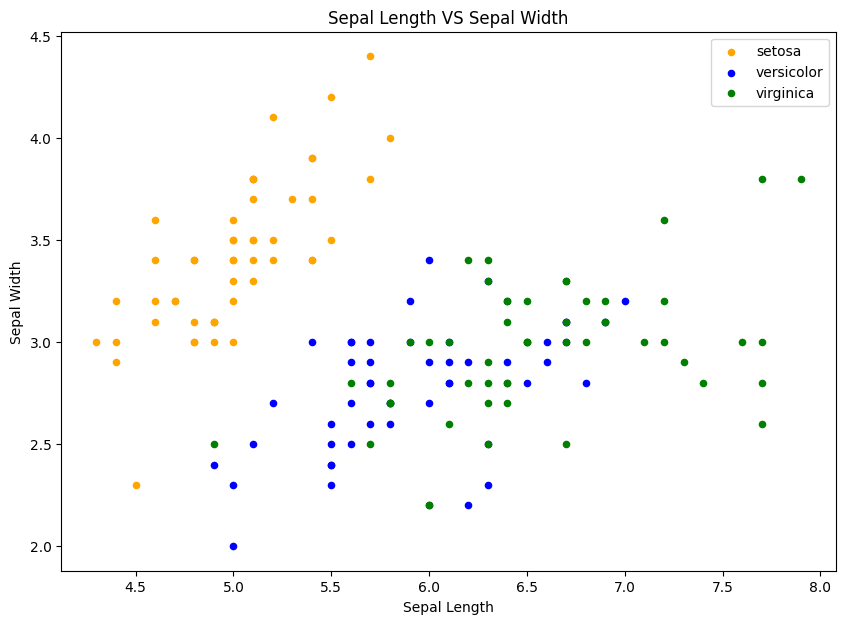

In [7]:
fig = iris[iris.Species == "Iris-setosa"].plot(kind = 'scatter', x='SepalLengthCm', y ='SepalWidthCm', color = 'orange', label = "setosa" )
iris[iris.Species == "Iris-versicolor"].plot(kind = 'scatter', x='SepalLengthCm', y ='SepalWidthCm', color = 'blue', label = "versicolor", ax = fig )
iris[iris.Species == "Iris-virginica"].plot(kind = 'scatter', x='SepalLengthCm', y ='SepalWidthCm', color = 'green', label = "virginica", ax = fig )

fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Sepal Width")

fig= plt.gcf()
fig.set_size_inches(10,7)
plt.show()

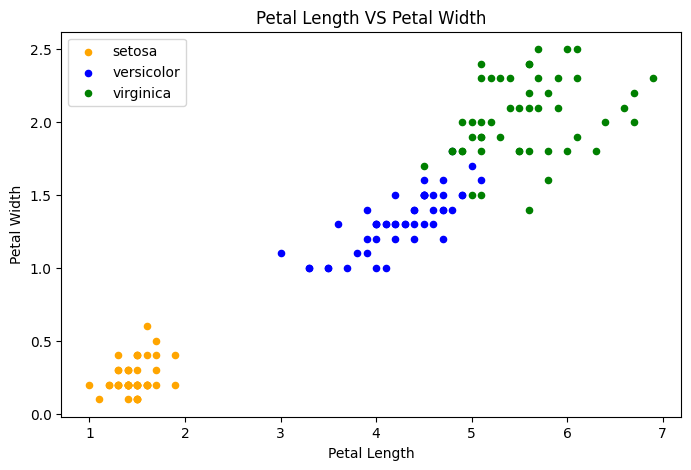

In [9]:
fig = iris[iris.Species == "Iris-setosa"].plot(kind = 'scatter', x='PetalLengthCm', y ='PetalWidthCm', color = 'orange', label = "setosa" )
iris[iris.Species == "Iris-versicolor"].plot(kind = 'scatter', x='PetalLengthCm', y ='PetalWidthCm', color = 'blue', label = "versicolor", ax = fig )
iris[iris.Species == "Iris-virginica"].plot(kind = 'scatter', x='PetalLengthCm', y ='PetalWidthCm', color = 'green', label = "virginica", ax = fig )

fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title("Petal Length VS Petal Width")

fig= plt.gcf()
fig.set_size_inches(8,5)
plt.show()

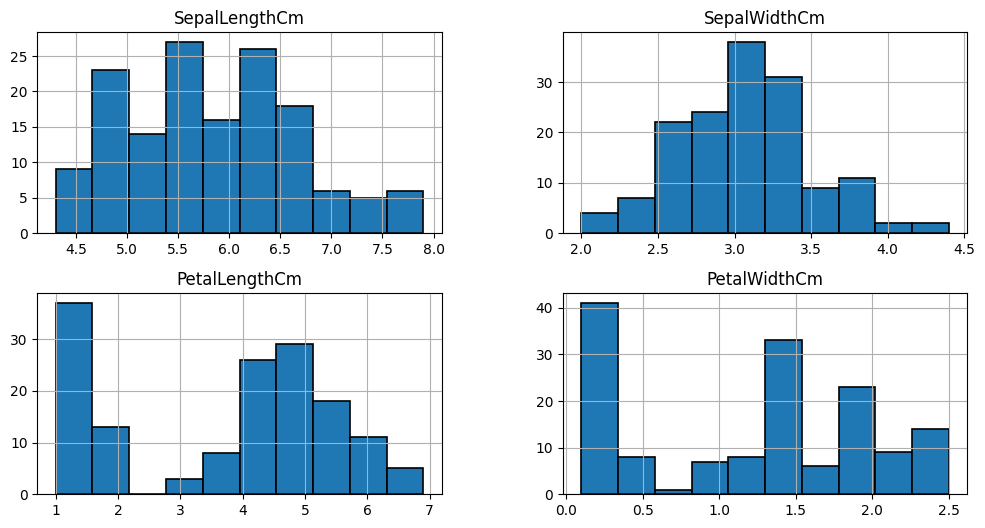

In [10]:
iris.hist(edgecolor = 'black', linewidth = 1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

4.Feature

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [12]:
iris.shape

(150, 5)

<ipython-input-13-f62731bc6137>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(),  annot = True,cmap= "cubehelix_r")


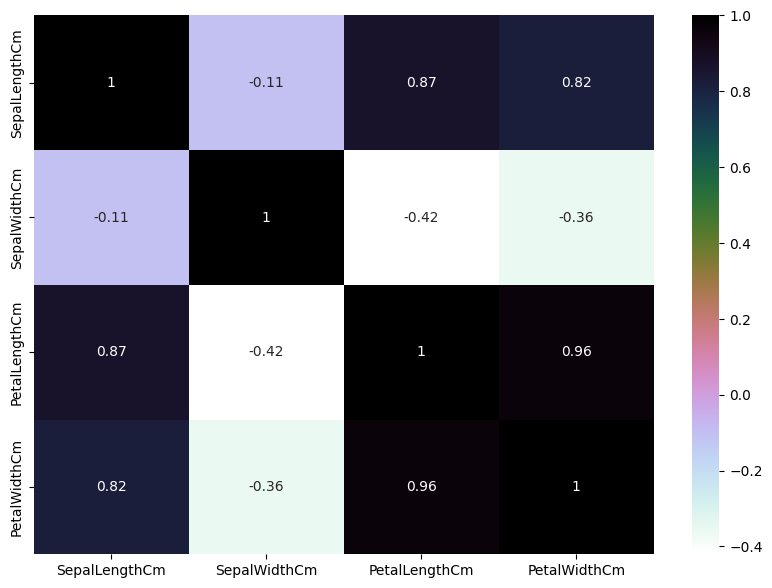

In [13]:
plt.figure(figsize= (10,7))
sns.heatmap(iris.corr(),  annot = True,cmap= "cubehelix_r")
plt.show()

Observation:

Sepal length and Sepal Width = > not correlated
Petal length and Petal Width = > high correlated
1 Petal Feature and 1 Sepal Feature = > not corr
=> Variance, Accuracy

Algorithm
=> train, test =>pass-> training data, fit, transform => pass -> testing data, predict => predicted outcome, accuracy

In [14]:
train, test = train_test_split(iris, test_size = 0.3)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [15]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm' ]]
train_y = train.Species

test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm' ]]
test_y = test.Species

In [16]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
98,5.1,2.5,3.0,1.1
88,5.6,3.0,4.1,1.3
129,7.2,3.0,5.8,1.6
35,5.0,3.2,1.2,0.2
53,5.5,2.3,4.0,1.3


In [17]:
test_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
22,4.6,3.6,1.0,0.2
28,5.2,3.4,1.4,0.2
122,7.7,2.8,6.7,2.0
109,7.2,3.6,6.1,2.5
118,7.7,2.6,6.9,2.3


5. Classifier

In [18]:
# 1. SVM
model = svm.SVC()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print("The Accuracy of SVM is: ",metrics.accuracy_score(prediction, test_y))

The Accuracy of SVM is:  0.9777777777777777


In [19]:
#2. Logistic Regression

model1  = LogisticRegression()
model1.fit(train_X, train_y)
prediction = model1.predict(test_X)
print("The Accuracy of LR is: ",metrics.accuracy_score(prediction, test_y))

The Accuracy of LR is:  0.9777777777777777


In [20]:
#3. Decision Tree - CART
model2 = DecisionTreeClassifier()
model2.fit(train_X, train_y)
prediction = model2.predict(test_X)
print("The Accuracy of DT is: ",metrics.accuracy_score(prediction, test_y))

The Accuracy of DT is:  0.8888888888888888


In [21]:
# 4. KNN
model3 = KNeighborsClassifier(n_neighbors = 3)
model3.fit(train_X, train_y)
prediction = model3.predict(test_X)
print("The Accuracy of KNN is: ",metrics.accuracy_score(prediction, test_y))

The Accuracy of KNN is:  0.9555555555555556


Towards Feature

In [26]:
petal = iris[['PetalLengthCm', 'PetalWidthCm', 'Species']]
sepal = iris[['SepalLengthCm','SepalWidthCm', 'Species']]

In [27]:
#For Petal
train_p, test_p = train_test_split(petal, test_size = 0.3, random_state =0)
train_x_p = train_p[['PetalLengthCm', 'PetalWidthCm' ]]
train_y_p = train_p.Species

test_x_p = test_p[['PetalLengthCm', 'PetalWidthCm' ]]
test_y_p = test_p.Species

In [28]:
#For Sepal
train_s, test_s = train_test_split(sepal, test_size = 0.3, random_state =0)
train_x_s = train_s[['SepalLengthCm','SepalWidthCm' ]]
train_y_s = train_s.Species

test_x_s = test_s[['SepalLengthCm','SepalWidthCm']]
test_y_s = test_s.Species

In [31]:
# 1. SVM
model = svm.SVC()
model.fit(train_x_p, train_y_p)
prediction = model.predict(test_x_p)
print("The Accuracy of SVM Petal is: ",metrics.accuracy_score(prediction, test_y_p))

model1 = svm.SVC()
model1.fit(train_x_s, train_y_s)
prediction1 = model1.predict(test_x_s)
print("The Accuracy of SVM Sepal is: ",metrics.accuracy_score(prediction1, test_y_s))

The Accuracy of SVM Petal is:  0.9777777777777777
The Accuracy of SVM Sepal is:  0.8


By the use of SVM the model has accuracy of petal is: 0.97, sepal is: 0.8